# Mice Protein Expression Data Set
## data set information
The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The aim is to identify subsets of proteins that are discriminant between the classes.


Attribute Information:

1 Mouse ID  
2..78 Values of expression levels of 77 proteins; the names of proteins are followed by â€œ_nâ€ indicating that they were measured in the nuclear fraction. For example DYRK1A_n  
79 Genotype: control (c) or trisomy (t)  
80 Treatment type: memantine (m) or saline (s)  
81 Behavior: context-shock (CS) or shock-context (SC)  
82 Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m  

### *** code start ***

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import urllib3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import os
matplotlib.style.use('ggplot')
plt.style.use('seaborn-white')

### Task 1: Retrieving and Preparing the Data
The student should retrieve the data correctly and prepare the data appropriately.

In [33]:
mice = pd.read_excel("C:/Users/new/Desktop/Practice data science/assignment2/Data_Cortex_Nuclear.xls")

In [34]:
# check the column names
columnlist = mice.columns.tolist()
print (columnlist)

['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class']


In [35]:
#check the dataType
nativeDTypes = mice.dtypes
countDTypes = nativeDTypes.value_counts()
print (countDTypes)

float64    77
object      5
dtype: int64


In [36]:
#check the valueCount of categore
mice[['Genotype', 'Treatment', 'Behavior', 'class']].apply(pd.Series.value_counts)

,Genotype,Treatment,Behavior,class
C/S,NaN,NaN,525.0,NaN
Control,570.0,NaN,NaN,NaN
Memantine,NaN,570.0,NaN,NaN
S/C,NaN,NaN,555.0,NaN
Saline,NaN,510.0,NaN,NaN
Ts65Dn,510.0,NaN,NaN,NaN
c-CS-m,NaN,NaN,NaN,150.0
c-CS-s,NaN,NaN,NaN,135.0
c-SC-m,NaN,NaN,NaN,150.0
c-SC-s,NaN,NaN,NaN,135.0


In [37]:
#rename class to Class, for the better look
mice.rename(columns = {'class': 'Class'}, inplace = True)

In [38]:
# create a new dataset with target mice protrein and attributes 
targetMice = mice[['MouseID', 'BRAF_N', 'pERK_N', 'S6_N',
                       'pGSK3B_N', 'CaNA_N', 'CDK5_N', 'pNUMB_N', 
                       'DYRK1A_N', 'ITSN1_N','SOD1_N', 'GFAP_N', 
                       'Genotype', 'Treatment', 'Behavior', 'Class']]

In [39]:
# check the target mice
targetMiceStats = targetMice.describe()
print (targetMiceStats)

            BRAF_N       pERK_N         S6_N     pGSK3B_N       CaNA_N  \
count  1077.000000  1077.000000  1080.000000  1080.000000  1080.000000   
mean      0.378519     0.545904     0.429226     0.161211     1.337784   
std       0.216388     0.345309     0.137440     0.019308     0.317126   
min       0.143894     0.149155     0.130206     0.099976     0.586479   
25%       0.264334     0.337405     0.316684     0.149253     1.081423   
50%       0.326658     0.443644     0.400999     0.160212     1.317441   
75%       0.413561     0.663297     0.534881     0.171739     1.585824   
max       2.133416     3.566685     0.822611     0.253210     2.129791   

            CDK5_N      pNUMB_N     DYRK1A_N      ITSN1_N       SOD1_N  \
count  1080.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.292434     0.357095     0.425810     0.617102     0.542635   
std       0.037380     0.063025     0.249362     0.251640     0.280568   
min       0.181157     0.185598     0

In [40]:
#missing value check
missingValueCheck = targetMice[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 
                        'ITSN1_N', 'SOD1_N', 'GFAP_N']].isnull()
missingValueList = missingValueCheck.apply(pd.Series.value_counts)
print (missingValueList)

       BRAF_N  pERK_N    S6_N  pGSK3B_N  CaNA_N  CDK5_N  pNUMB_N  DYRK1A_N  \
False    1077    1077  1080.0    1080.0  1080.0  1080.0     1077      1077   
True        3       3     NaN       NaN     NaN     NaN        3         3   

       ITSN1_N  SOD1_N  GFAP_N  
False     1077    1077  1080.0  
True         3       3     NaN  


In [41]:
#remove all string categories value
targetMice['Genotype'].replace('Control', '1', inplace=True)
targetMice['Genotype'].replace('Ts65Dn', '0', inplace=True)
targetMice['Genotype'] = targetMice['Genotype'].astype(int)
targetMice['Behavior'].replace('C/S', '1', inplace=True)
targetMice['Behavior'].replace('S/C', '0', inplace=True)
targetMice['Behavior'] = targetMice['Behavior'].astype(int)
targetMice['Treatment'].replace('Saline', '1', inplace=True)
targetMice['Treatment'].replace('Memantine', '0', inplace=True)
targetMice['Treatment'] = targetMice['Treatment'].astype(int)

E:\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [42]:
targetMice[['Behavior', 'Genotype', 'Treatment']].apply(pd.Series.value_counts)

,Behavior,Genotype,Treatment
0,555,510,570
1,525,570,510


In [43]:
#convert binary to unique numbers
def change_class(row):
    row['Class'] = row['Genotype'] * 4 + row['Behavior'] * 2 + row['Treatment']
    return row

In [44]:
#use the def to convert in all target mice data
targetMice = targetMice.apply(change_class, axis=1)

In [45]:
#check  the value count
targetMice['Class'].value_counts()

6    150
4    150
7    135
5    135
2    135
1    135
0    135
3    105
Name: Class, dtype: int64

Text(0.5, 0.98, 'Normalized Boxplot')

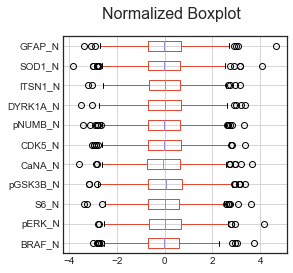

In [46]:
#give back a normalized (mean = 0) box plot with outliers
targetMiceBoxPlot = pd.DataFrame(np.random.randn(1080, 11), columns=['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N'])
targetMiceBoxPlot.boxplot(figsize=(4,4), vert=False)
plt.suptitle('Normalized Boxplot', fontsize=16)

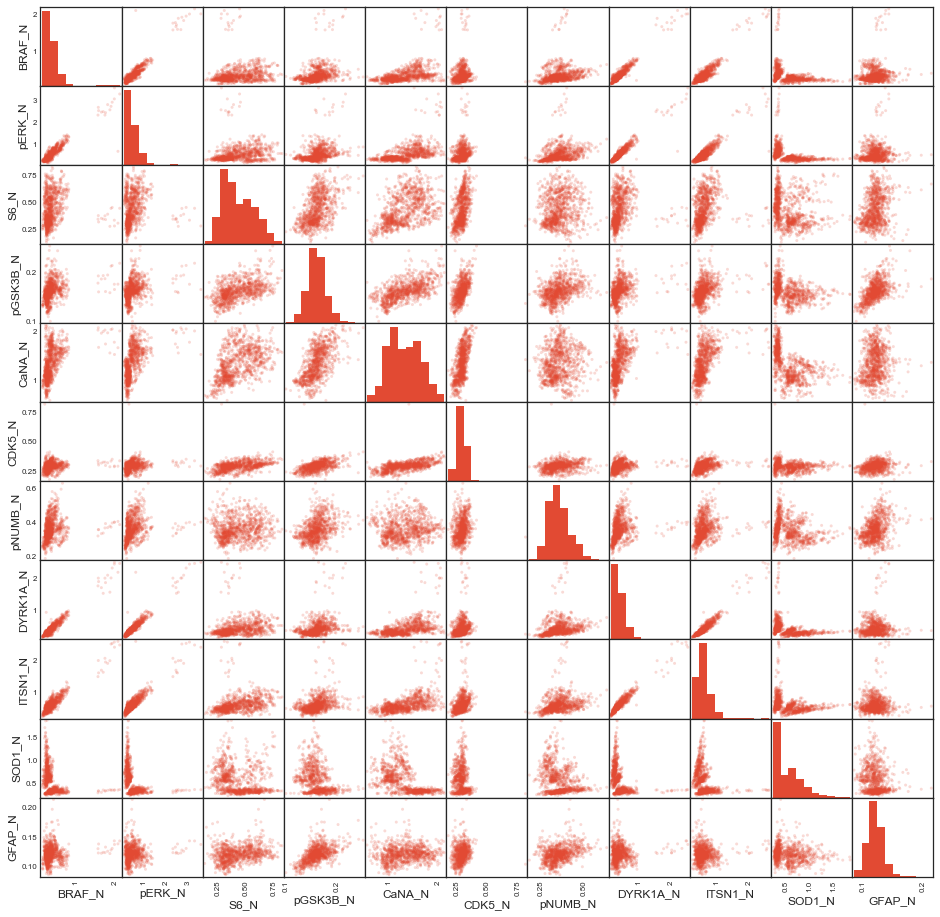

In [47]:
#Mice Protein Expression Scatter Matrix
from pandas.plotting import scatter_matrix
scatterProteins = targetMice[['MouseID', 'BRAF_N', 'pERK_N', 'S6_N', 
                                  'pGSK3B_N', 'CaNA_N', 'CDK5_N', 'pNUMB_N', 
                                  'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N']]
scatter_matrix(scatterProteins, alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()

In [48]:
miceIDs = mice['MouseID'].str.split('_').apply(pd.Series, 1)[0].unique()
MakeMouseID = mice['MouseID'].str.split('_').apply(pd.Series, 1)[0].unique()

In [49]:
#create protein names list
proteinNames = ['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 'CaNA_N', 'CDK5_N', 'pNUMB_N', 
                'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 'GFAP_N']

In [50]:
proteinRows = []
for proteinName in proteinNames:
    count = targetMice[proteinName].count()
    mean = targetMice[proteinName].mean()
    sd = targetMice[proteinName].std()
    minusThreeSD = mean - (3 * sd)
    minusTwoSD = mean - (2 * sd)
    twoSD = mean + (2 * sd)
    threeSD = mean + (3 * sd)
    outliers = targetMice.query(proteinName + ' < ' + str(minusThreeSD) + 
                                    ' | ' + proteinName + ' > ' + str(threeSD))

    row = {'Protein': proteinName,'Count': count,'Mean': mean,'SD': sd,
           '-3SD': minusThreeSD,'-2SD': minusTwoSD,'+2SD': twoSD,
           '+3SD': threeSD,'Outliers': outliers[proteinName].count()}
    proteinRows.append(row)

nnPctRangeDF = pd.DataFrame(proteinRows, index=proteinNames, 
                            columns=['Count', 'Mean', 'SD', '-3SD', 
                                     '-2SD', '+2SD', '+3SD', 'Outliers'])

In [51]:
print (nnPctRangeDF)

          Count      Mean        SD      -3SD      -2SD      +2SD      +3SD  \
BRAF_N     1077  0.378519  0.216388 -0.270645 -0.054257  0.811294  1.027682   
pERK_N     1077  0.545904  0.345309 -0.490023 -0.144714  1.236522  1.581831   
S6_N       1080  0.429226  0.137440  0.016905  0.154345  0.704106  0.841546   
pGSK3B_N   1080  0.161211  0.019308  0.103287  0.122595  0.199827  0.219135   
CaNA_N     1080  1.337784  0.317126  0.386405  0.703531  1.972036  2.289162   
CDK5_N     1080  0.292434  0.037380  0.180294  0.217674  0.367194  0.404574   
pNUMB_N    1077  0.357095  0.063025  0.168019  0.231044  0.483145  0.546171   
DYRK1A_N   1077  0.425810  0.249362 -0.322276 -0.072914  0.924534  1.173896   
ITSN1_N    1077  0.617102  0.251640 -0.137818  0.113822  1.120382  1.372022   
SOD1_N     1077  0.542635  0.280568 -0.299070 -0.018501  1.103771  1.384339   
GFAP_N     1080  0.120889  0.013233  0.081189  0.094423  0.147356  0.160589   

          Outliers  
BRAF_N          15  
pERK_N   

In [52]:
outlierMiceRows = []
for proteinName in proteinNames:

    mean = targetMice[proteinName].mean()
    sd = targetMice[proteinName].std()
    minusThreeSD = mean - (3 * sd)
    threeSD = mean + (3 * sd)
    outliers = targetMice.query(proteinName + ' < ' + str(minusThreeSD) + 
                                    ' | ' + proteinName + ' > ' + str(threeSD))

    if outliers.empty:
        row = {'Protein': proteinName,'MouseID': '-','# Instances': '-','Genotype': '-',
           'Treatment': '-','Behavior': '-','Class': '-'}
        outlierMiceRows.append(row)
    else:
        for mouseID in miceIDs:
            mouseOutlierRows = outliers[outliers['MouseID'].str.contains(mouseID)]
            if not mouseOutlierRows.empty:
                    row = {'Protein': proteinName,'MouseID': mouseID,
                           '# Instances': len(mouseOutlierRows),
                           'Genotype': mouseOutlierRows['Genotype'].iloc[0],
                           'Treatment': mouseOutlierRows['Treatment'].iloc[0],
                           'Behavior': mouseOutlierRows['Behavior'].iloc[0],
                           'Class': mouseOutlierRows['Class'].iloc[0]}
                    outlierMiceRows.append(row)

outliersDF = pd.DataFrame(outlierMiceRows, 
                          columns=['Protein', 'MouseID','# Instances', 
                                   'Genotype','Treatment', 'Behavior', 'Class'])

In [53]:
print (outliersDF)

     Protein MouseID # Instances Genotype Treatment Behavior Class
0     BRAF_N    3484          15        1         1        1     7
1     pERK_N    3484          14        1         1        1     7
2       S6_N       -           -        -         -        -     -
3   pGSK3B_N    3415           1        1         0        1     6
4   pGSK3B_N  50810A           4        1         1        1     7
5   pGSK3B_N  50810D           2        1         1        1     7
6   pGSK3B_N  50810F           3        1         1        1     7
7   pGSK3B_N   18899           1        0         1        1     3
8     CaNA_N       -           -        -         -        -     -
9     CDK5_N    3480           1        1         1        1     7
10    CDK5_N  50810A           2        1         1        1     7
11   pNUMB_N     311           1        1         0        1     6
12   pNUMB_N    3497           5        1         1        1     7
13  DYRK1A_N    3484          15        1         1        1  

In [54]:
#change all outliers back to NaN
def make_nans(row):
    for proteinName in proteinNames:
        mean = targetMice[proteinName].mean()
        sd = targetMice[proteinName].std()
        minusThreeSD = mean - (3 * sd)
        threeSD = mean + (3 * sd)
    
        if row[proteinName] < minusThreeSD or row[proteinName] > threeSD:
            row[proteinName] = None
        return row
targetMice = targetMice.apply(make_nans, axis=1)

In [55]:
#missing value check and strip to NaN
missingValueCheck = targetMice[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 
                        'ITSN1_N', 'SOD1_N', 'GFAP_N']].isnull()
missingValueList = missingValueCheck.apply(pd.Series.value_counts)

print (missingValueList)

       BRAF_N  pERK_N    S6_N  pGSK3B_N  CaNA_N  CDK5_N  pNUMB_N  DYRK1A_N  \
False    1062    1077  1080.0    1080.0  1080.0  1080.0     1077      1077   
True       18       3     NaN       NaN     NaN     NaN        3         3   

       ITSN1_N  SOD1_N  GFAP_N  
False     1077    1077  1080.0  
True         3       3     NaN  


In [56]:
targetMice = targetMice[~targetMice['MouseID'].str.contains('3484')]
indexOfMouse = np.where(miceIDs=='3484')[0]
miceIDs = np.delete(miceIDs, indexOfMouse)

In [57]:
def make_averages(row):
    for proteinName in proteinNames:
        if np.isnan(row[proteinName]):
            average = targetMice[targetMice.Class == row['Class']][proteinName].mean()
            row[proteinName] = average
    return row
targetMice = targetMice.apply(make_averages, axis=1)

In [58]:
missingValueCheck = targetMice[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                        'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 
                        'ITSN1_N', 'SOD1_N', 'GFAP_N']].isnull()
missingValueList = missingValueCheck.apply(pd.Series.value_counts)
print (missingValueList)

       BRAF_N  pERK_N  S6_N  pGSK3B_N  CaNA_N  CDK5_N  pNUMB_N  DYRK1A_N  \
False    1065    1065  1065      1065    1065    1065     1065      1065   

       ITSN1_N  SOD1_N  GFAP_N  
False     1065    1065    1065  


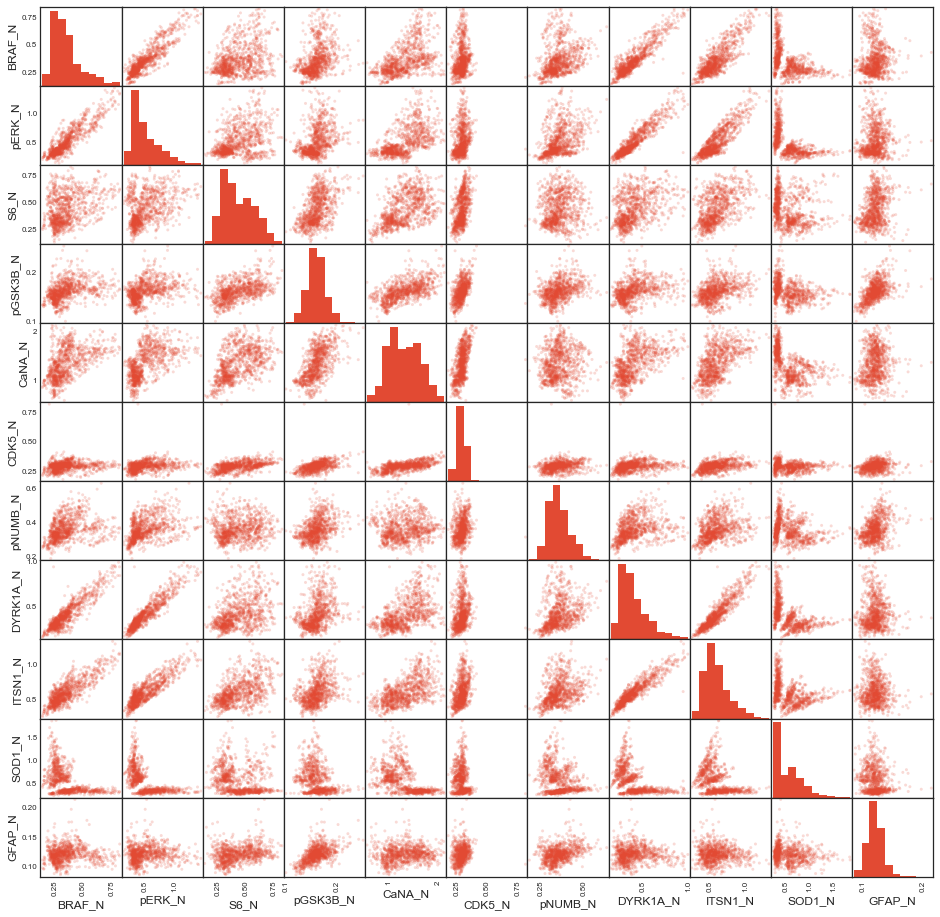

In [59]:
scatterProteins = targetMice[['MouseID', 'BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                                  'CaNA_N', 'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 
                                  'SOD1_N', 'GFAP_N']]
scatter_matrix(scatterProteins, alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()

In [60]:
targetMice.to_csv("finalData.csv")

#### Task 2.1: Explore each column

In [130]:
mean_mouse_values = mice.groupby(by=['Class']).mean().reset_index()

In [131]:
class_labels = ['Genotype','Treatment','Behavior','Class', 'MouseNumber', 'MouseVersion']
meltMice = pd.melt(mice, id_vars = class_labels)

In [132]:
expression_level_means = meltMice.groupby(by=['variable']).max().reset_index()

In [133]:
variable_list = expression_level_means.sort_values(by='value').variable

In [134]:
variable_subsets = np.array(variable_list).reshape(11,7)

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

class PlotManager(object):
    def __init__(self):
        self.i = 1
    def save_last_plt(self):
        plt.savefig('Figure_{}.png'.format(self.i))
        self.i += 1

plt_manager = PlotManager()

In [136]:
def plot_expression_values():
    for (i, variable_subset) in enumerate(variable_subsets):
        data = meltMice.loc[meltMice.variable.isin(variable_subset)]

        sns.violinplot(x="variable", y="value", hue="variable", width=1, data=data, scale="area", orient="v")     

        sns.despine(left=True)
        plt.figure(figsize=(100,100))
        #plt_manager.save_last_plt()
        yield plt.show()

In [137]:
expression_plots = plot_expression_values()

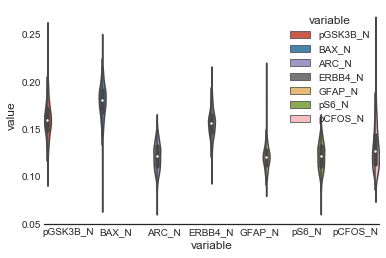

<Figure size 7200x7200 with 0 Axes>

In [138]:
next(expression_plots)

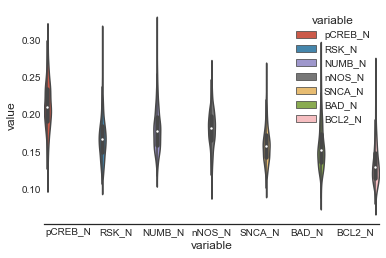

<Figure size 7200x7200 with 0 Axes>

In [139]:
next(expression_plots)

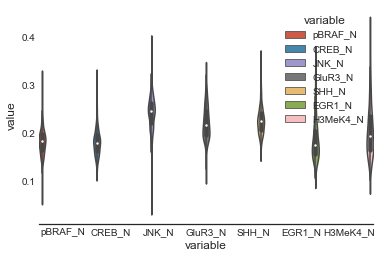

<Figure size 7200x7200 with 0 Axes>

In [140]:
next(expression_plots)

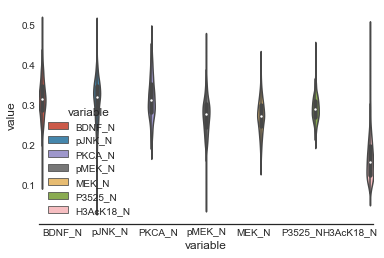

<Figure size 7200x7200 with 0 Axes>

In [141]:
next(expression_plots)

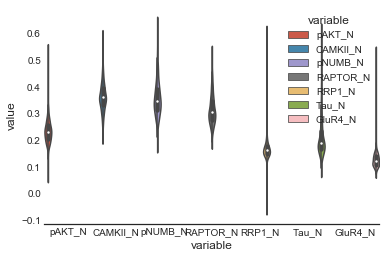

<Figure size 7200x7200 with 0 Axes>

In [142]:
next(expression_plots)

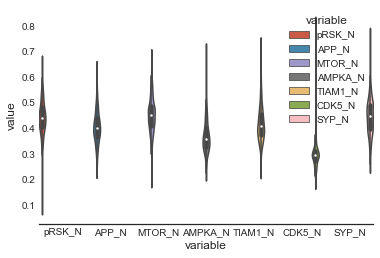

<Figure size 7200x7200 with 0 Axes>

In [143]:
next(expression_plots)

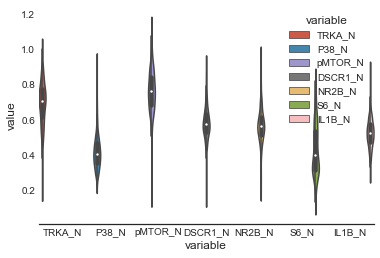

<Figure size 7200x7200 with 0 Axes>

In [144]:
next(expression_plots)

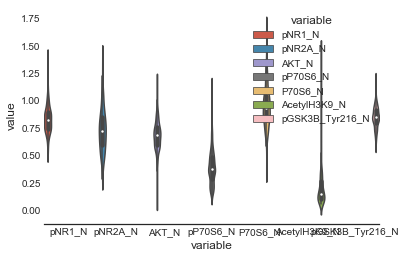

<Figure size 7200x7200 with 0 Axes>

In [145]:
next(expression_plots)

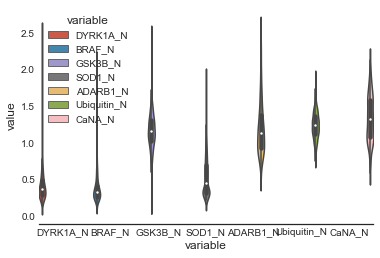

<Figure size 7200x7200 with 0 Axes>

In [146]:
next(expression_plots)

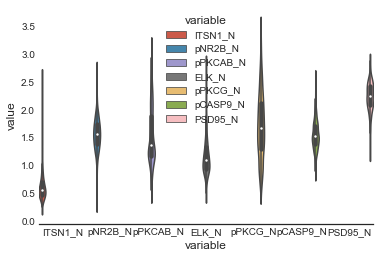

<Figure size 7200x7200 with 0 Axes>

In [147]:
next(expression_plots)

#### Task 2.2: Explore the relationship between pairs of attributes

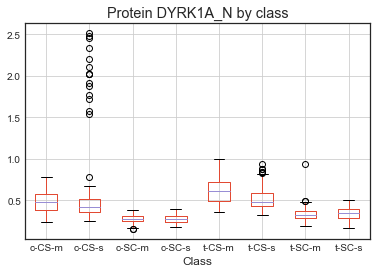

<Figure size 7200x7200 with 0 Axes>

In [148]:
mice.boxplot(column='DYRK1A_N', by ='Class')
plt.title('Protein DYRK1A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt.figure(figsize=(100,100))
plt.show()
#plt_manager.save_last_plt()

In [149]:
mice2=mice.loc[mice['Class'] == 'c-CS-s']

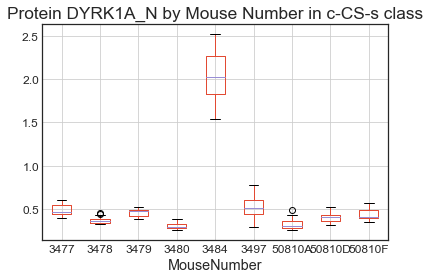

In [150]:
mice2.boxplot(column='DYRK1A_N', by ='MouseNumber')
plt.title('Protein DYRK1A_N by Mouse Number in c-CS-s class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
plt.show()
#plt_manager.save_last_plt()

In [151]:
mice2a=mice2.loc[mice2['MouseNumber'] == '3484']

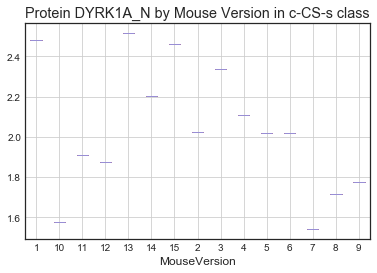

In [152]:
mice2a.boxplot(column='DYRK1A_N', by ='MouseVersion')
plt.title('Protein DYRK1A_N by Mouse Version in c-CS-s class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

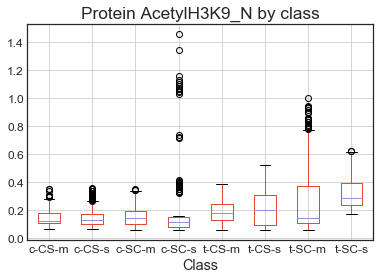

In [153]:
mice.boxplot(column='AcetylH3K9_N', by ='Class')
plt.title('Protein AcetylH3K9_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

In [154]:
mice3=mice.loc[mice['Class'] == 'c-SC-s']

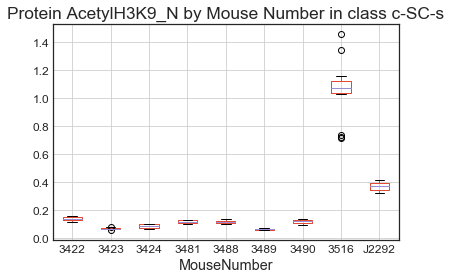

In [155]:
mice3.boxplot(column='AcetylH3K9_N', by ='MouseNumber')
plt.title('Protein AcetylH3K9_N by Mouse Number in class c-SC-s')
plt.rcParams.update({'font.size': 8})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

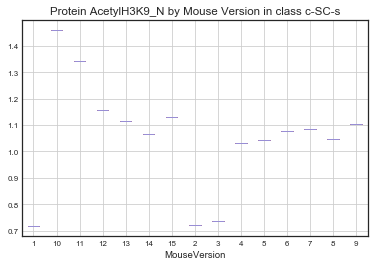

In [156]:
mice3a=mice3.loc[mice3['MouseNumber'] == '3516']
mice3a.boxplot(column='AcetylH3K9_N', by ='MouseVersion')
plt.title('Protein AcetylH3K9_N by Mouse Version in class c-SC-s')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

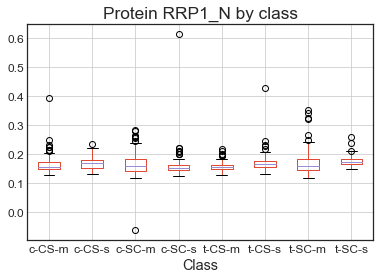

In [157]:
mice.boxplot(column='RRP1_N', by ='Class')
plt.title('Protein RRP1_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

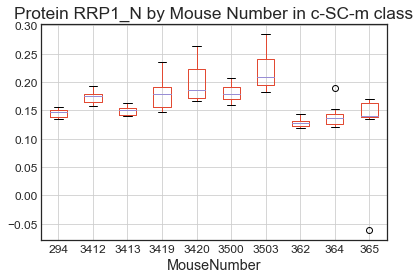

In [158]:
mice1=mice.loc[mice['Class'] == 'c-SC-m']
mice1.boxplot(column='RRP1_N', by ='MouseNumber')
plt.title('Protein RRP1_N by Mouse Number in c-SC-m class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

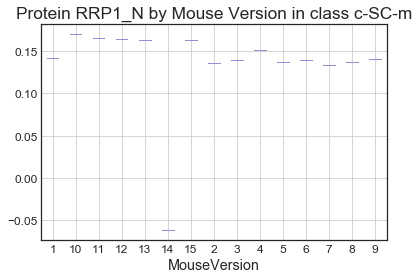

In [159]:
mice1a=mice1.loc[mice1['MouseNumber'] == '365']
mice1a.boxplot(column='RRP1_N', by ='MouseVersion')
plt.title('Protein RRP1_N by Mouse Version in class c-SC-m')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

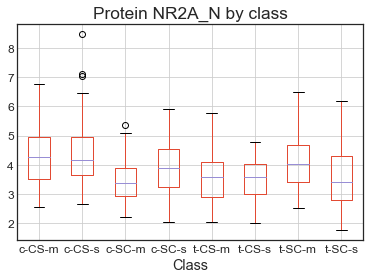

In [160]:
mice.boxplot(column='NR2A_N', by ='Class')
plt.title('Protein NR2A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

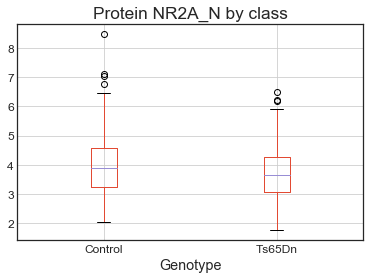

In [161]:
mice.boxplot(column='NR2A_N', by ='Genotype')
plt.title('Protein NR2A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()


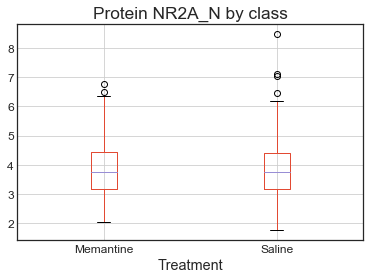

In [162]:
mice.boxplot(column='NR2A_N', by ='Treatment')
plt.title('Protein NR2A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

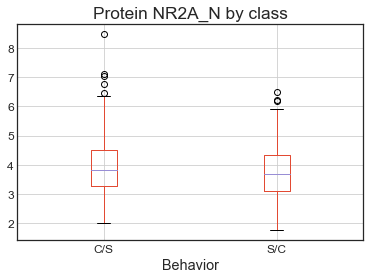

In [163]:
mice.boxplot(column='NR2A_N', by ='Behavior')
plt.title('Protein NR2A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

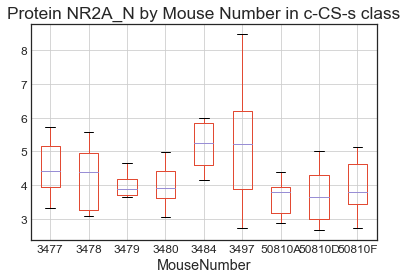

In [164]:
mice4=mice.loc[mice['Class'] == 'c-CS-s']
mice4.boxplot(column='NR2A_N', by ='MouseNumber')
plt.title('Protein NR2A_N by Mouse Number in c-CS-s class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

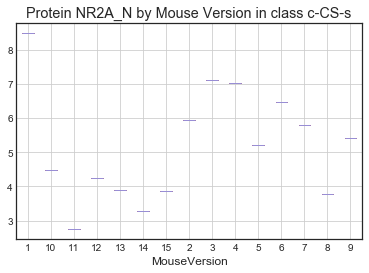

In [165]:
mice4a=mice4.loc[mice4['MouseNumber'] == '3497']
mice4a.boxplot(column='NR2A_N', by ='MouseVersion')
plt.title('Protein NR2A_N by Mouse Version in class c-CS-s')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

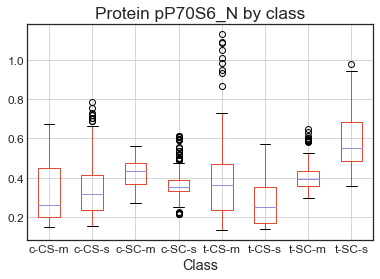

In [166]:
mice.boxplot(column='pP70S6_N', by ='Class')
plt.title('Protein pP70S6_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

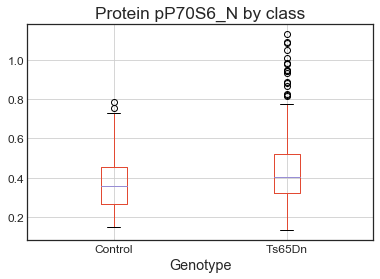

In [167]:
mice.boxplot(column='pP70S6_N', by ='Genotype')
plt.title('Protein pP70S6_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()


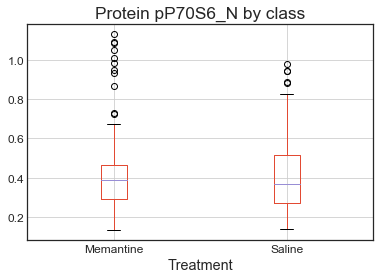

In [168]:
mice.boxplot(column='pP70S6_N', by ='Treatment')
plt.title('Protein pP70S6_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

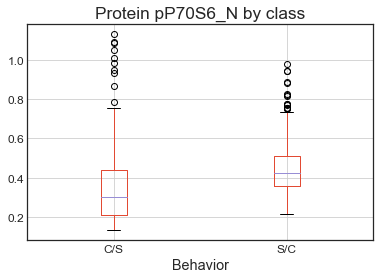

In [169]:
mice.boxplot(column='pP70S6_N', by ='Behavior')
plt.title('Protein pP70S6_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

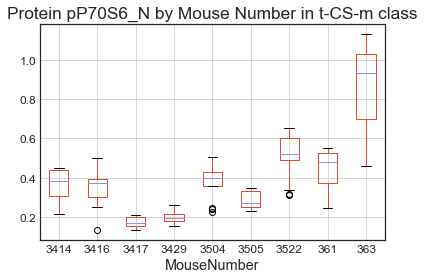

In [170]:
mice5=mice.loc[mice['Class'] == 't-CS-m']
mice5.boxplot(column='pP70S6_N', by ='MouseNumber')
plt.title('Protein pP70S6_N by Mouse Number in t-CS-m class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

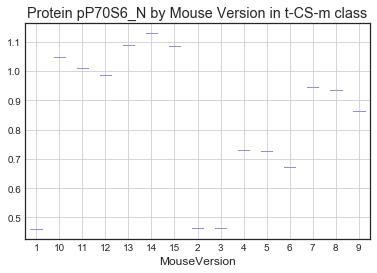

In [171]:
mice5a=mice5.loc[mice['MouseNumber'] == '363']
mice5a.boxplot(column='pP70S6_N', by ='MouseVersion')
plt.title('Protein pP70S6_N by Mouse Version in t-CS-m class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
#plt_manager.save_last_plt()

plt.show()

### Task 3: Data Modelling
The student should select the features appropriately. The model should be trained and evaluated appropriately, and the parameters of the model should be tuned appropriately.

#### KNN 

In [172]:
Protein_class = targetMice[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 'CaNA_N', 
                             'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N',
                             'GFAP_N']]
X_train, X_test, y_train, y_test = train_test_split(Protein_class, 
                                                    targetMice['Class'], 
                                                    test_size=0.4)
print (X_train.shape)
print (y_train.shape)

(639, 11)
(639,)


In [173]:
clf = KNeighborsClassifier(5)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm5 = confusion_matrix(y_test, predicted)

In [174]:
print (cm5)

[[46  0  0  0  1  0  0  0]
 [ 5 58  0  0  0  0  0  0]
 [ 0  0 40  6  0  0  6  0]
 [ 0  0  1 28  0  0  1  1]
 [ 5  0  0  0 49  4  0  0]
 [ 1  0  0  0  4 52  0  0]
 [ 0  1  5  3  2  1 45  0]
 [ 0  0  3  8  0  0 11 39]]


In [175]:
print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88        47
           1       0.98      0.92      0.95        63
           2       0.82      0.77      0.79        52
           3       0.62      0.90      0.74        31
           4       0.88      0.84      0.86        58
           5       0.91      0.91      0.91        57
           6       0.71      0.79      0.75        57
           7       0.97      0.64      0.77        61

    accuracy                           0.84       426
   macro avg       0.84      0.84      0.83       426
weighted avg       0.86      0.84      0.84       426



In [176]:
clf = KNeighborsClassifier(2)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm2 = confusion_matrix(y_test, predicted)

In [177]:
print (cm2)

[[47  0  0  0  0  0  0  0]
 [ 3 60  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  4  0]
 [ 0  0  0 31  0  0  0  0]
 [ 6  0  0  0 49  3  0  0]
 [ 2  3  0  0  2 50  0  0]
 [ 0  1  9  1  2  1 43  0]
 [ 0  0  4  8  0  0 13 36]]


In [113]:
print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       0.90      0.90      0.90        52
           2       0.72      0.94      0.82        52
           3       0.89      0.89      0.89        37
           4       1.00      0.95      0.97        60
           5       0.98      0.92      0.95        65
           6       0.84      0.77      0.81        62
           7       1.00      0.77      0.87        47

    accuracy                           0.89       426
   macro avg       0.90      0.89      0.89       426
weighted avg       0.90      0.89      0.90       426



In [114]:
clf = KNeighborsClassifier(8)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm8 = confusion_matrix(y_test, predicted)

In [115]:
print(cm8)

[[43  6  0  0  2  0  0  0]
 [ 5 44  0  0  1  2  0  0]
 [ 0  0 45  1  0  0  6  0]
 [ 0  0  5 31  0  0  1  0]
 [ 2  0  0  0 55  3  0  0]
 [ 3  2  0  0  6 54  0  0]
 [ 0  0  9  5  0  0 41  7]
 [ 0  0  2  3  0  0  7 35]]


In [116]:
print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        51
           1       0.85      0.85      0.85        52
           2       0.74      0.87      0.80        52
           3       0.78      0.84      0.81        37
           4       0.86      0.92      0.89        60
           5       0.92      0.83      0.87        65
           6       0.75      0.66      0.70        62
           7       0.83      0.74      0.79        47

    accuracy                           0.82       426
   macro avg       0.82      0.82      0.82       426
weighted avg       0.82      0.82      0.82       426



In [117]:
clf = KNeighborsClassifier(5, weights='distance')
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm5d = confusion_matrix(y_test, predicted)

In [118]:
print(cm5d)

[[46  4  0  0  1  0  0  0]
 [ 3 49  0  0  0  0  0  0]
 [ 0  0 45  3  0  0  4  0]
 [ 0  0  0 32  0  0  1  4]
 [ 2  0  0  0 55  3  0  0]
 [ 0  0  0  0  2 63  0  0]
 [ 0  0  4  3  0  0 53  2]
 [ 0  0  2  1  0  0  6 38]]


In [119]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        51
           1       0.92      0.94      0.93        52
           2       0.88      0.87      0.87        52
           3       0.82      0.86      0.84        37
           4       0.95      0.92      0.93        60
           5       0.95      0.97      0.96        65
           6       0.83      0.85      0.84        62
           7       0.86      0.81      0.84        47

    accuracy                           0.89       426
   macro avg       0.89      0.89      0.89       426
weighted avg       0.89      0.89      0.89       426



In [120]:
clf = KNeighborsClassifier(8, weights='distance')
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm8d = confusion_matrix(y_test, predicted)

In [121]:
print (cm8d)

[[45  5  0  0  1  0  0  0]
 [ 4 47  0  0  1  0  0  0]
 [ 0  0 45  2  0  0  5  0]
 [ 0  0  2 33  0  0  1  1]
 [ 2  0  0  0 55  3  0  0]
 [ 0  0  0  0  2 63  0  0]
 [ 0  0  5  3  0  0 48  6]
 [ 0  0  2  1  0  0  7 37]]


In [122]:
print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.90      0.90      0.90        52
           2       0.83      0.87      0.85        52
           3       0.85      0.89      0.87        37
           4       0.93      0.92      0.92        60
           5       0.95      0.97      0.96        65
           6       0.79      0.77      0.78        62
           7       0.84      0.79      0.81        47

    accuracy                           0.88       426
   macro avg       0.87      0.87      0.87       426
weighted avg       0.88      0.88      0.88       426



In [123]:
clf = KNeighborsClassifier(5, weights='distance', p=1)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm5dp1 = confusion_matrix(y_test, predicted)

In [124]:
print (cm5dp1)

[[48  3  0  0  0  0  0  0]
 [ 3 48  0  0  1  0  0  0]
 [ 0  0 44  4  0  0  4  0]
 [ 0  0  0 37  0  0  0  0]
 [ 3  0  0  0 54  3  0  0]
 [ 0  1  0  0  1 63  0  0]
 [ 0  0  2  3  0  0 55  2]
 [ 0  0  1  0  0  0  4 42]]


In [125]:
print (classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        51
           1       0.92      0.92      0.92        52
           2       0.94      0.85      0.89        52
           3       0.84      1.00      0.91        37
           4       0.96      0.90      0.93        60
           5       0.95      0.97      0.96        65
           6       0.87      0.89      0.88        62
           7       0.95      0.89      0.92        47

    accuracy                           0.92       426
   macro avg       0.92      0.92      0.92       426
weighted avg       0.92      0.92      0.92       426



In [126]:
clf = KNeighborsClassifier(8, weights='distance', p=1)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
cm8dp1 = confusion_matrix(y_test, predicted)

In [127]:
print (cm8dp1)

[[47  4  0  0  0  0  0  0]
 [ 0 50  0  0  1  1  0  0]
 [ 0  0 46  2  0  0  4  0]
 [ 0  0  0 36  0  0  0  1]
 [ 3  0  0  0 54  3  0  0]
 [ 0  1  0  0  1 63  0  0]
 [ 0  0  4  3  0  0 49  6]
 [ 0  0  1  0  0  0  5 41]]


In [128]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.91      0.96      0.93        52
           2       0.90      0.88      0.89        52
           3       0.88      0.97      0.92        37
           4       0.96      0.90      0.93        60
           5       0.94      0.97      0.95        65
           6       0.84      0.79      0.82        62
           7       0.85      0.87      0.86        47

    accuracy                           0.91       426
   macro avg       0.90      0.91      0.91       426
weighted avg       0.91      0.91      0.91       426



#### Decision tree

In [129]:
df_class = targetMice[['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 'CaNA_N',
                       'CDK5_N', 'pNUMB_N', 'DYRK1A_N', 'ITSN1_N', 'SOD1_N',
                       'GFAP_N', 'Class']]

y = df_class.pop('Class')
X = df_class

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

#X_train, X_test, y_train, y_test = train_test_split(proteins, proteins, random_state = 0)
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)


print (cm)
print (classification_report(y_test, y_pre))
with open("class_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,
                             feature_names=['BRAF_N', 'pERK_N', 'S6_N', 'pGSK3B_N', 
                                            'CaNA_N', 'CDK5_N', 'pNUMB_N',
                                            'DYRK1A_N', 'ITSN1_N', 'SOD1_N', 
                                            'GFAP_N'], class_names="01234567",
                             filled=True, rounded=True, special_characters=True)
os.system("dot class_tree.dot -o class_tree.png -Tpng")

[[25  1  0  0  2  0  0  0]
 [ 2 23  0  0  2  0  0  0]
 [ 0  0 18  3  0  0  7  1]
 [ 0  0  1 18  0  0  2  2]
 [ 1  0  0  0 21  1  5  0]
 [ 1  1  0  0  1 30  0  0]
 [ 0  0  3  2  0  0 16  5]
 [ 0  0  0  1  0  0  5 13]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.92      0.85      0.88        27
           2       0.82      0.62      0.71        29
           3       0.75      0.78      0.77        23
           4       0.81      0.75      0.78        28
           5       0.97      0.91      0.94        33
           6       0.46      0.62      0.52        26
           7       0.62      0.68      0.65        19

    accuracy                           0.77       213
   macro avg       0.78      0.76      0.77       213
weighted avg       0.79      0.77      0.78       213



1